Getting a Simple Timeline with the Data Visualized

In [1]:
# Install the libraries needed for the project
%pip install matplotlib pandas numpy plotly nbformat ipython

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os, sys
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# Preprocess the Data

In [3]:
test_data = "data/job001_Beerling_original.out"

# View the Data

In [4]:
# load raw data, sep is tab
raw = pd.read_csv(test_data,sep="\t")

# Strip all whitespace in the column names
raw.columns = raw.columns.str.strip()
# Strip all whitespace in the column values
raw = raw.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

raw

,sim,state,soln,dist_x,time,step,pH,pe,N,Na,...,dk_Ilmenite,k_Glass,dk_Glass,k_MikeSorghum,dk_MikeSorghum,SurfH_Ca,SurfH_Mg,SurfH_H,Hfo_PO4,Unnamed: 92
0,1,i_soln,0,-99.000,-99.0,-99,8.10000,4.0000,0.000464,0.000180,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,NaN
1,1,i_soln,1,-99.000,-99.0,-99,8.10000,4.0000,0.000464,0.000180,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,NaN
2,1,react,0,-99.000,0.0,1,7.77981,12.9020,0.000464,0.000180,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,NaN
3,2,i_exch,1,-99.000,-99.0,-99,8.10000,4.0000,0.000464,0.000180,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,NaN
4,3,i_surf,1,-99.000,-99.0,-99,8.10000,4.0000,0.000464,0.000180,...,0.0,0.0,0.0,0.0,0.0,0.021727,0.001211,0.077437,0.000000e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,1,transp,7,0.325,157825000.0,100,7.24426,15.0329,0.000334,0.000568,...,0.0,0.0,0.0,0.0,0.0,0.009470,0.000571,0.111620,6.764500e-06,NaN
1112,1,transp,8,0.375,157825000.0,100,7.16534,15.0308,0.000329,0.000348,...,0.0,0.0,0.0,0.0,0.0,0.009377,0.000559,0.116540,1.930100e-08,NaN
1113,1,transp,9,0.425,157825000.0,100,7.10706,14.9478,0.000335,0.000270,...,0.0,0.0,0.0,0.0,0.0,0.009241,0.000553,0.120140,3.431600e-11,NaN
1114,1,transp,10,0.475,157825000.0,100,7.05164,13.7762,0.000344,0.000246,...,0.0,0.0,0.0,0.0,0.0,0.009077,0.000554,0.123580,4.370800e-14,NaN


# Plot the PH over Time
We can simply plot the pH over time by seeing if the current time is greater than 1.0

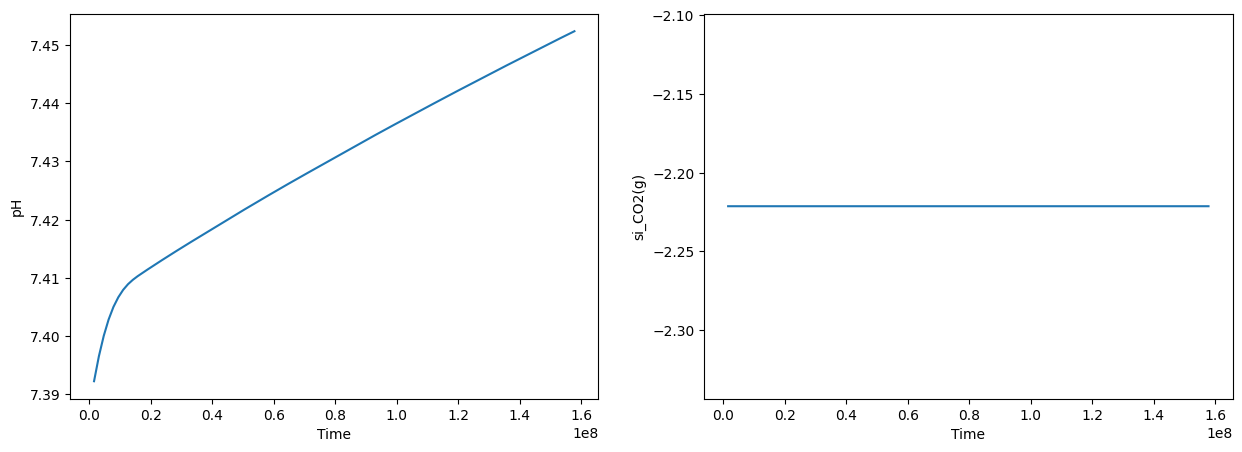

In [5]:
# Make a dataframe with the raw tsv data and make a copy of it for future reference
df = pd.DataFrame(raw)
original_df = df.copy()

# Go through the time steps and average the other numeric columns which share the same time step, then remove the duplicate rows
# and skip over the columns that are not numeric
for i in df.time.unique():
    for j in df.columns[1:]:
        if df[j].dtype == "float64":
            df.loc[df.time == i, j] = df.loc[df.time == i, j].mean()

# Remove the rows where time is below or equal to 0
df = df[df.time > 0]
df = df.drop_duplicates()

# Go through the dataframe and chart out the time series with the pH and CO2 on the y axis and time on the x axis
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df["time"],df["pH"])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("pH")
ax[1].plot(df["time"],df["si_CO2(g)"])
ax[1].set_xlabel("Time")
ax[1].set_ylabel("si_CO2(g)")
plt.show()

In [6]:
df

,sim,state,soln,dist_x,time,step,pH,pe,N,Na,...,dk_Ilmenite,k_Glass,dk_Glass,k_MikeSorghum,dk_MikeSorghum,SurfH_Ca,SurfH_Mg,SurfH_H,Hfo_PO4,Unnamed: 92
16,1,transp,1,0.275,1578250.0,1,7.392225,14.001745,0.000347,0.000324,...,-0.000071,0.169455,-0.059382,0.000014,0.000014,0.009937,0.000609,0.101001,0.008129,NaN
17,1,transp,2,0.275,1578250.0,1,7.392225,14.001745,0.000347,0.000324,...,-0.000071,0.169455,-0.059382,0.000014,0.000014,0.009937,0.000609,0.101001,0.008129,NaN
18,1,transp,3,0.275,1578250.0,1,7.392225,14.001745,0.000347,0.000324,...,-0.000071,0.169455,-0.059382,0.000014,0.000014,0.009937,0.000609,0.101001,0.008129,NaN
19,1,transp,4,0.275,1578250.0,1,7.392225,14.001745,0.000347,0.000324,...,-0.000071,0.169455,-0.059382,0.000014,0.000014,0.009937,0.000609,0.101001,0.008129,NaN
20,1,transp,5,0.275,1578250.0,1,7.392225,14.001745,0.000347,0.000324,...,-0.000071,0.169455,-0.059382,0.000014,0.000014,0.009937,0.000609,0.101001,0.008129,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,1,transp,7,0.275,157825000.0,100,7.452382,14.528191,0.000375,0.000889,...,-0.000007,0.000000,0.000000,0.000454,0.000000,0.008968,0.000788,0.097546,0.008274,NaN
1112,1,transp,8,0.275,157825000.0,100,7.452382,14.528191,0.000375,0.000889,...,-0.000007,0.000000,0.000000,0.000454,0.000000,0.008968,0.000788,0.097546,0.008274,NaN
1113,1,transp,9,0.275,157825000.0,100,7.452382,14.528191,0.000375,0.000889,...,-0.000007,0.000000,0.000000,0.000454,0.000000,0.008968,0.000788,0.097546,0.008274,NaN
1114,1,transp,10,0.275,157825000.0,100,7.452382,14.528191,0.000375,0.000889,...,-0.000007,0.000000,0.000000,0.000454,0.000000,0.008968,0.000788,0.097546,0.008274,NaN


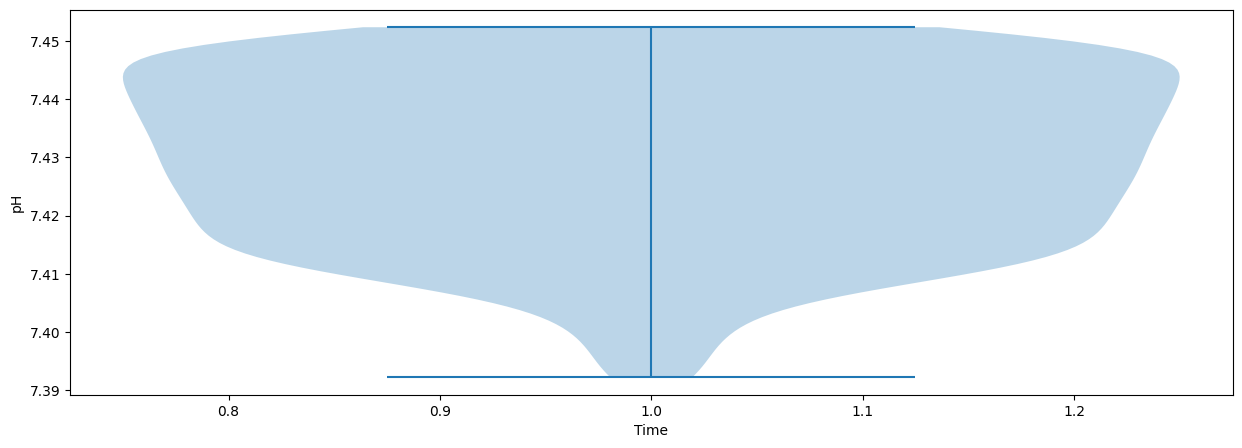

In [7]:
# Show the distribution of the pH values over time
fig, ax = plt.subplots(1,figsize=(15,5))
ax.violinplot(df["pH"])
ax.set_xlabel("Time")
ax.set_ylabel("pH")
plt.show()

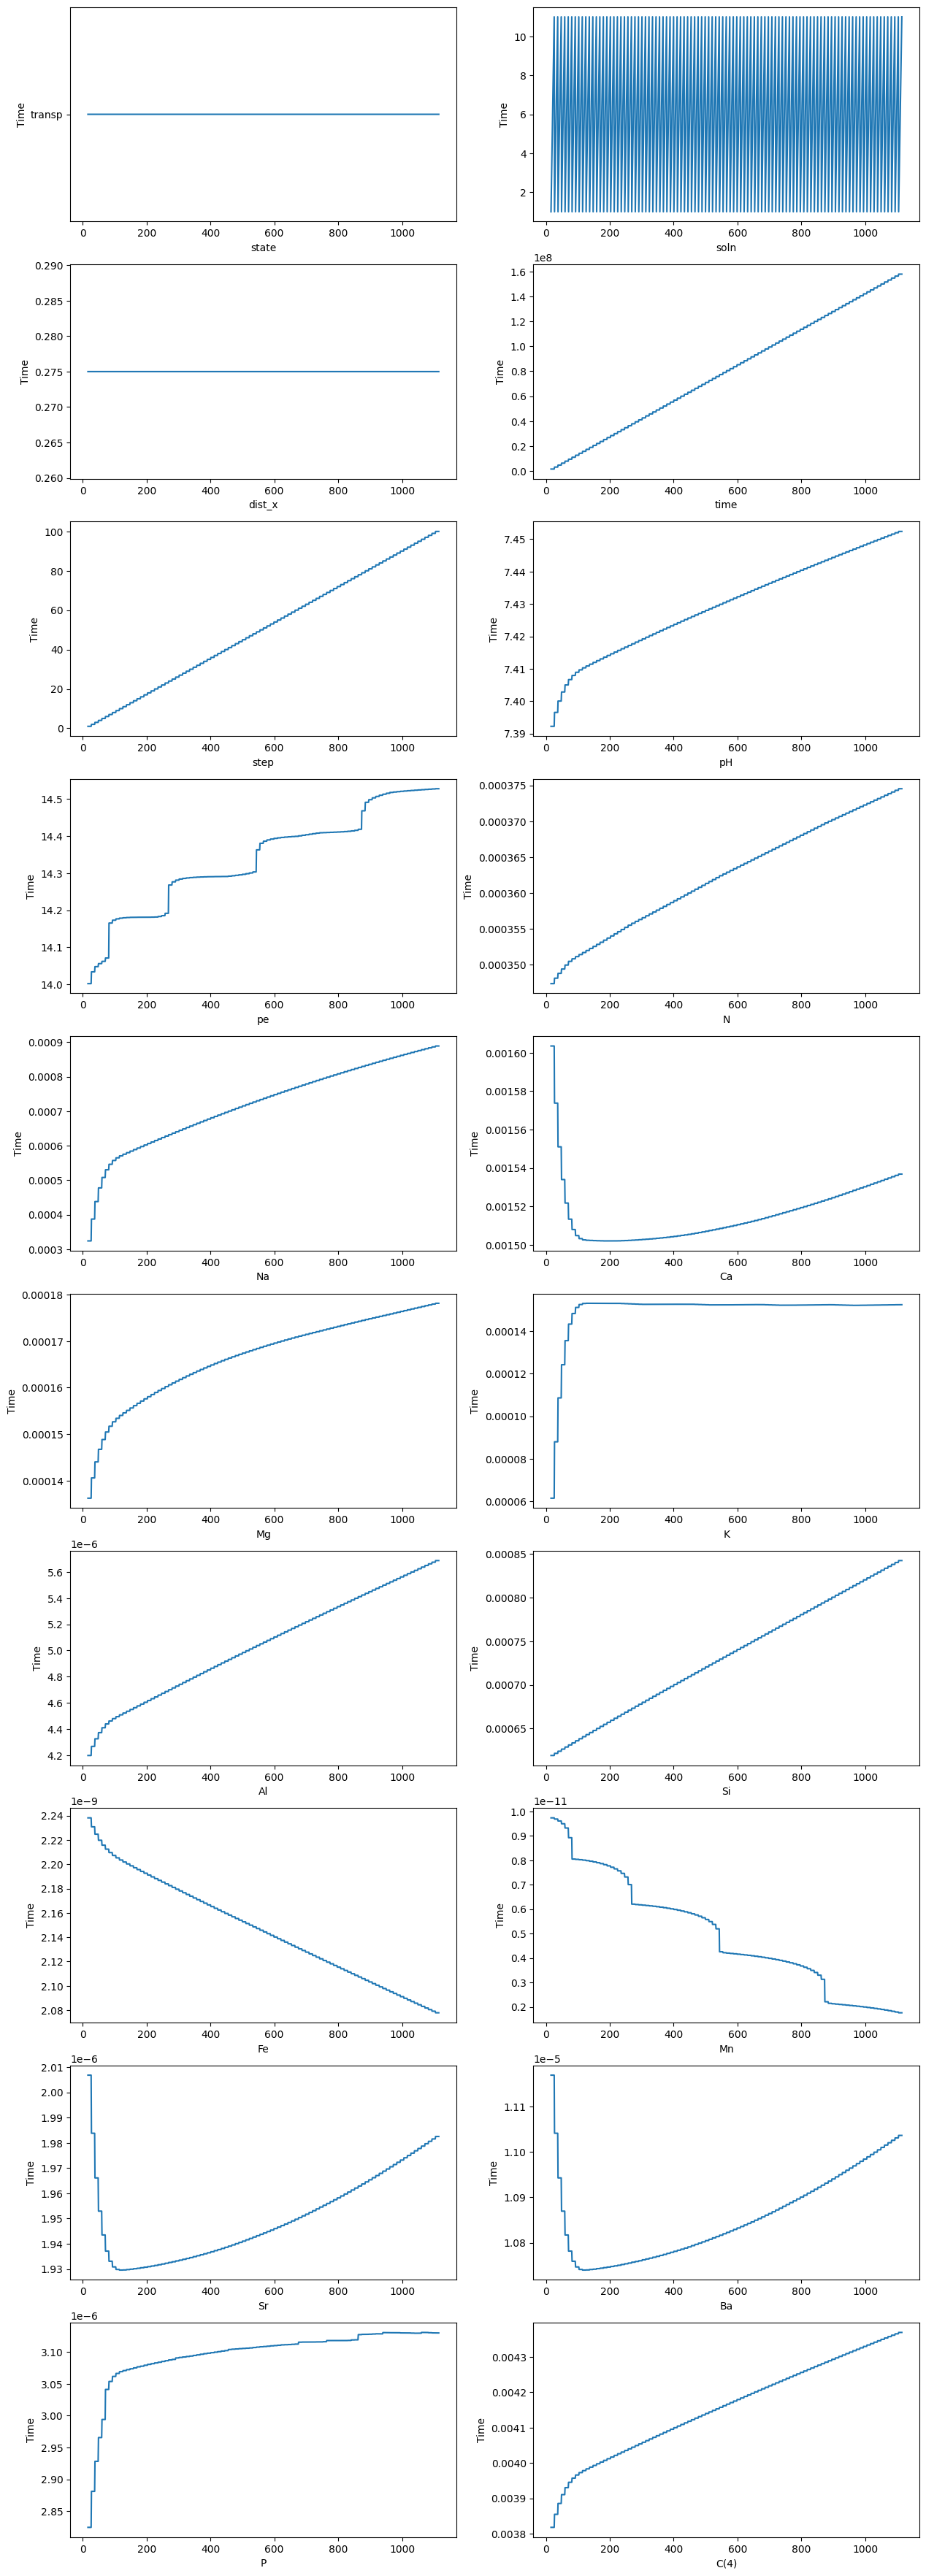

In [8]:
# Show the distribution of each of the numeric columns over time in plots, violins and histograms arranged in a grid
graph_width = 2
graph_height = 10

fig, ax = plt.subplots(graph_height,graph_width,figsize=(15,45))
for i in range(graph_height):
    for j in range(graph_width):
        try:
            ax[i,j].plot(df[df.columns[i*graph_width+j+1]])
            ax[i,j].set_xlabel(df.columns[i*graph_width+j+1])
            ax[i,j].set_ylabel("Time")
        except:
            pass
plt.show()


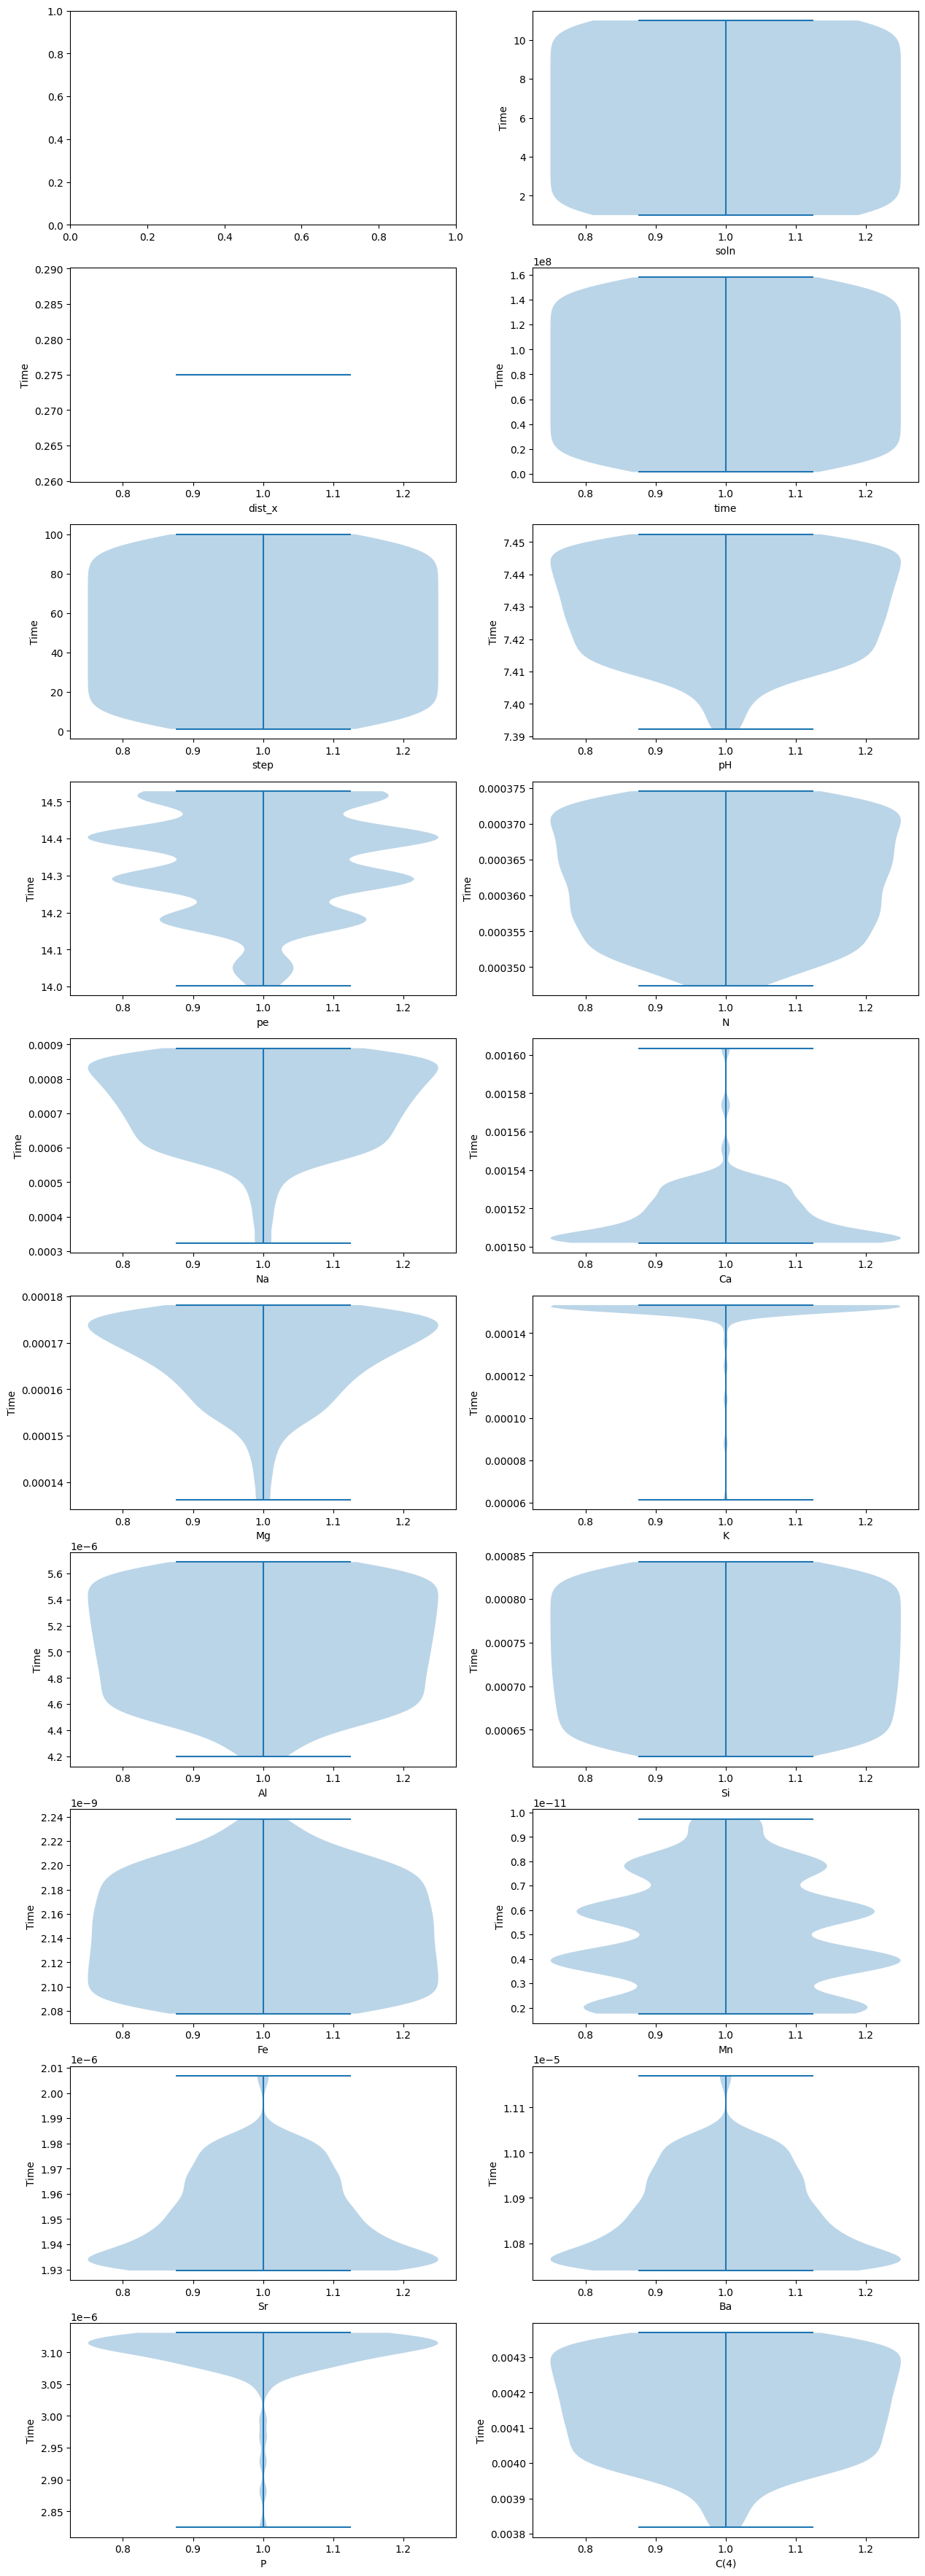

In [9]:
fig, ax = plt.subplots(graph_height,graph_width,figsize=(15,45))
for i in range(graph_height):
    for j in range(graph_width):
        try:
            ax[i,j].violinplot(df[df.columns[i*graph_width+j+1]])
            ax[i,j].set_xlabel(df.columns[i*graph_width+j+1])
            ax[i,j].set_ylabel("Time")
        except:
            pass
plt.show()

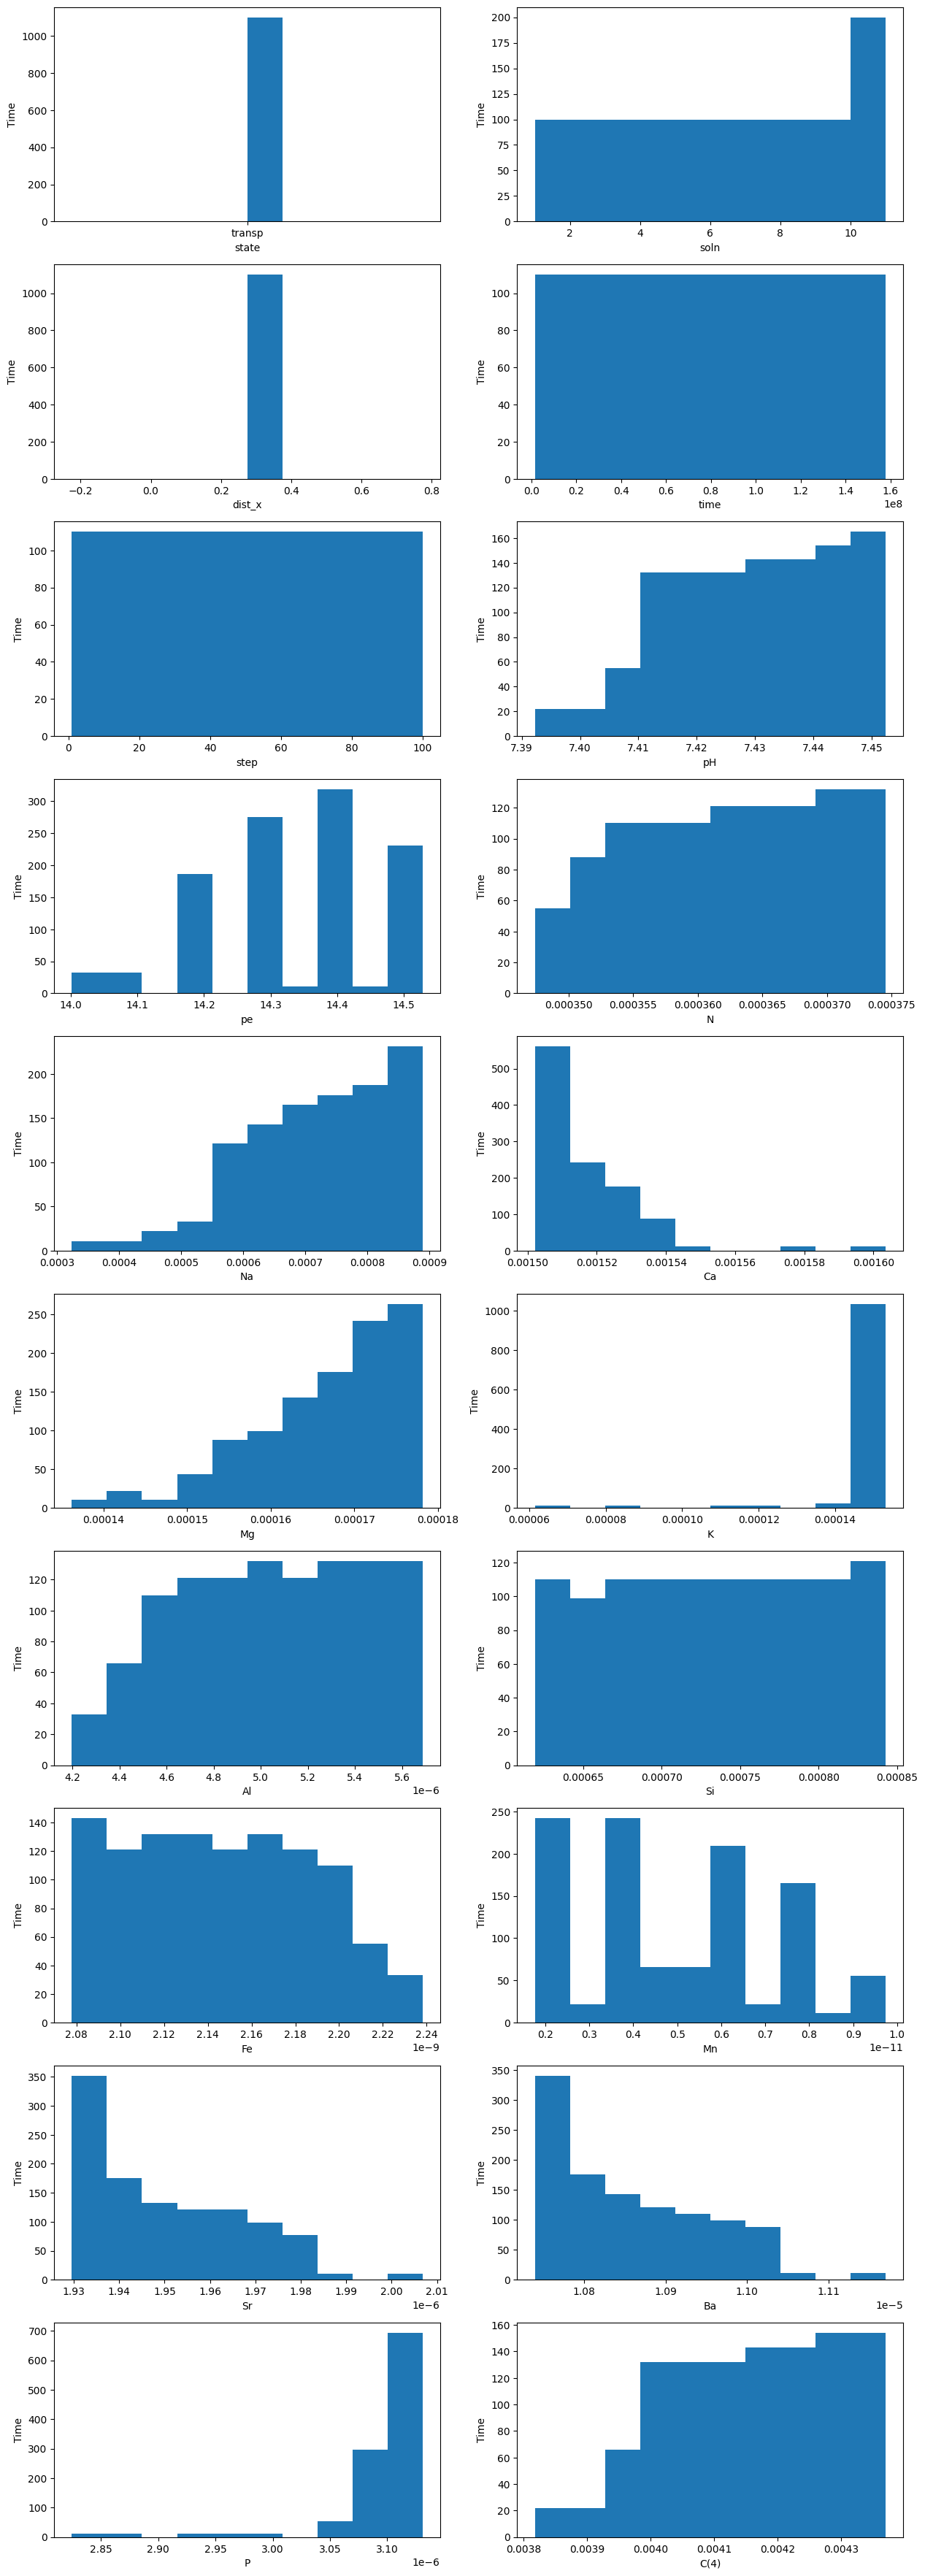

In [10]:
# Show the distribution of each of the numeric columns over time in histograms arranged in a grid

fig, ax = plt.subplots(graph_height,graph_width,figsize=(15,45))
for i in range(graph_height):
    for j in range(graph_width):
        try:
            ax[i,j].hist(df[df.columns[i*graph_width+j+1]])
            ax[i,j].set_xlabel(df.columns[i*graph_width+j+1])
            ax[i,j].set_ylabel("Time")
        except:
            pass
plt.show()

In [13]:
# Create a line chart for pH over time
fig1 = px.line(df, x="time", y="pH", title="pH Over Time")
fig1.update_xaxes(title="Time")
fig1.update_yaxes(title="pH")

# Create a line chart for si_CO2(g) over time
fig2 = px.line(df, x="time", y="si_CO2(g)", title="si_CO2(g) Over Time")
fig2.update_xaxes(title="Time")
fig2.update_yaxes(title="d_CO2(g)")

# Display the plots
fig1.show()
fig2.show()
df.columns

Index(['sim', 'state', 'soln', 'dist_x', 'time', 'step', 'pH', 'pe', 'N', 'Na',
       'Ca', 'Mg', 'K', 'Al', 'Si', 'Fe', 'Mn', 'Sr', 'Ba', 'P', 'C(4)',
       'Hfo_s', 'Hfo_w', 'm_CaX2', 'm_KX', 'm_MgX2', 'm_NaX', 'm_FeX2',
       'm_MnX2', 'm_SrX2', 'm_AlX3', 'm_BaX2', 'm_Hfo_wH2PO4', 'm_Hfo_wHPO4-',
       'Calcite', 'd_Calcite', 'SiO2(a)', 'd_SiO2(a)', 'Al(OH)3(a)',
       'd_Al(OH)3(a)', 'Pyrolusite', 'd_Pyrolusite', 'Fe(OH)3(a)',
       'd_Fe(OH)3(a)', 'O2(g)', 'd_O2(g)', 'CO2(g)', 'd_CO2(g)', 'si_Calcite',
       'si_SiO2(a)', 'si_Al(OH)3(a)', 'si_Pyrolusite', 'si_Fe(OH)3(a)',
       'si_O2(g)', 'si_CO2(g)', 'si_Quartz', 'si_Plagioclase', 'si_Apatite',
       'si_Diopside_Mn', 'si_Diopside', 'si_Olivine', 'si_Alkali-feldspar',
       'si_Montmorillonite', 'si_Ilmenite', 'si_Glass', 'si_MikeSorghum',
       'k_Quartz', 'dk_Quartz', 'k_Plagioclase', 'dk_Plagioclase', 'k_Apatite',
       'dk_Apatite', 'k_Diopside_Mn', 'dk_Diopside_Mn', 'k_Diopside',
       'dk_Diopside', 'k_Olivine